In [1]:
import cv2
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime
import pandas as pd 
import gc
import pickle
import requests
from requests.auth import HTTPBasicAuth, HTTPDigestAuth
import os

%matplotlib inline

In [2]:
idr = '/lcrc/project/waggle/scott/thermal_camera/jan_snow'
all_files = os.listdir(idr)

In [3]:
jansnow = []
for file in all_files:
    if 'jan' in file:
        jansnow.append(file)

In [4]:
jansnow.sort()

In [5]:
jansnow

['jansnow2_data_20210125_175422.npy',
 'jansnow2_data_20210125_175510.npy',
 'jansnow2_data_20210125_175558.npy',
 'jansnow2_data_20210125_175646.npy',
 'jansnow2_data_20210125_175734.npy',
 'jansnow2_data_20210125_175822.npy',
 'jansnow_data_20210125_151714.npy',
 'jansnow_data_20210125_151802.npy',
 'jansnow_data_20210125_151850.npy',
 'jansnow_data_20210125_151939.npy',
 'jansnow_data_20210125_152027.npy',
 'jansnow_data_20210125_152115.npy',
 'jansnow_data_20210125_152203.npy',
 'jansnow_data_20210125_152251.npy',
 'jansnow_data_20210125_152339.npy',
 'jansnow_data_20210125_152427.npy',
 'jansnow_data_20210125_152515.npy',
 'jansnow_data_20210125_152603.npy',
 'jansnow_data_20210125_152651.npy',
 'jansnow_data_20210125_152739.npy',
 'jansnow_data_20210125_152827.npy',
 'jansnow_data_20210125_152916.npy',
 'jansnow_data_20210125_153004.npy',
 'jansnow_data_20210125_153052.npy',
 'jansnow_data_20210125_153140.npy',
 'jansnow_data_20210125_153227.npy',
 'jansnow_data_20210125_153316.n

In [6]:
tms, fr, nf, dt, ems, bees = np.load(os.path.join(idr,jansnow[0]), allow_pickle=True)

In [7]:
bees

array([-6.525     , -6.70714286, -7.07272727, -8.3       , -7.46666667])

In [8]:
(fr[3]-bees[3])/ems[3]

array([[ 15.,  15.,  15., ...,  16.,  16.,  16.],
       [ 15.,  15.,  15., ...,  16.,  16.,  16.],
       [ 15.,  15.,  15., ...,  16.,  16.,  16.],
       ...,
       [117., 116., 116., ..., 105., 107., 107.],
       [117., 117., 117., ...,  98.,  97.,  97.],
       [117., 117., 117., ...,  93.,  93.,  93.]])

In [9]:
image_data = np.zeros((len(jansnow), fr[3].shape[0], fr[3].shape[1]))

In [10]:
intercepts = np.zeros(len(jansnow))
gradients = np.zeros(len(jansnow))
times = np.empty(len(jansnow), dtype=datetime.datetime)

In [11]:
for i in range(len(jansnow)):
    tms, fr, nf, dt, ems, bees = np.load(os.path.join(idr,jansnow[i]), allow_pickle=True)
    image_data[i,:] = (fr[3]-bees[3])/ems[3]
    times[i] = tms[3]
    gradients[i] = ems[3]
    intercepts[i] = bees[3]

In [12]:
(len(jansnow), fr[3].shape[0], fr[3].shape[1])

(185, 480, 640)

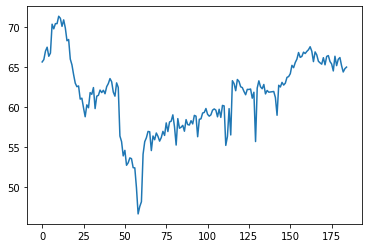

In [13]:
plt.plot(image_data.mean(axis=1).mean(axis=1))

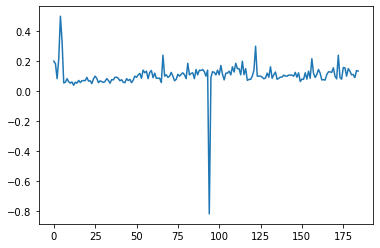

In [14]:
plt.plot(gradients)